In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from mpl_toolkits.mplot3d import Axes3D

In [19]:
iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd["species"] = iris.target
iris_pd.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


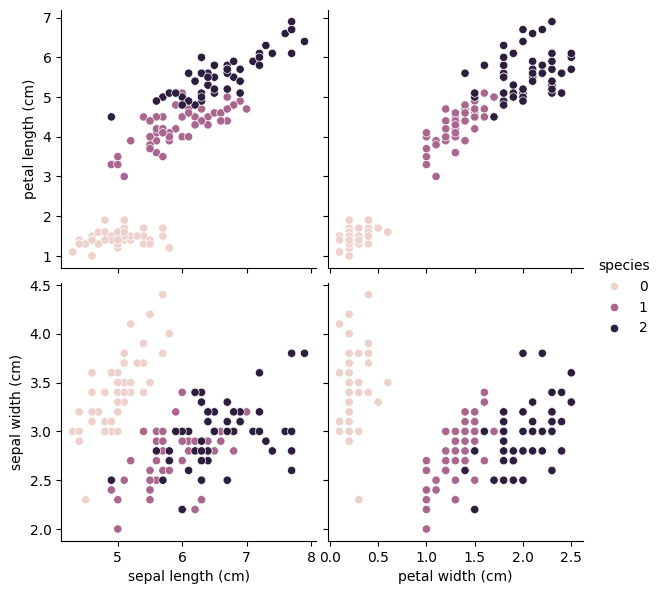

In [20]:
sns.pairplot(iris_pd, hue="species", height=3,
             x_vars=["sepal length (cm)", "petal width (cm)"],
             y_vars=["petal length (cm)", "sepal width (cm)"])


In [21]:
iris_ss = StandardScaler().fit_transform(iris.data)

iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [22]:
def get_pca_data(ss_data, n_component=2):
    pca = PCA(n_components=n_component)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [23]:
iris_pca, pca = get_pca_data(iris_ss, n_component=2)
iris_ss.shape #??? 결과값 다름

(150, 4)

In [24]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [25]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [26]:
def get_pd_from_pca(pca_data, cols=["pca_component_1", "pca_component_2"]):
    return pd.DataFrame(pca_data, columns=cols)

In [28]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca["species"] = iris.target
iris_pd_pca.head(3)

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


In [30]:
def print_variance_ratio(pca):
    print(pca.explained_variance_ratio_)
    print(np.sum(pca.explained_variance_ratio_))
    
print_variance_ratio(pca)

[0.72962445 0.22850762]
0.9581320720000164


In [32]:
def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring="accuracy", cv=cv)
    print(np.mean(scores_rf))
    
rf_scores(iris_ss, iris.target)

0.96


In [33]:
pca_X = iris_pd_pca[["pca_component_1", "pca_component_2"]]

rf_scores(pca_X, iris.target)

0.9066666666666666


In [34]:
red_wine = pd.read_csv("../cv_data/winequality-red.csv", sep=";")
white_wine = pd.read_csv("../cv_data/winequality-white.csv", sep=";")

red_wine["color"] = 1
white_wine["color"] = 0
wine = pd.concat([red_wine, white_wine])

wine["taste"] = [1. if grade>5 else 0. for grade in wine["quality"]]

X = wine.drop(["taste", "quality"], axis=1)
y = wine["taste"]

In [35]:
wine_y = wine["color"]
wine_X = wine.drop(["color"], axis=1)
wine_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [36]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961, -1.31348836],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961, -1.31348836],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961, -1.31348836]])

In [37]:
pca_wine, pca = get_pca_data(wine_ss, n_component=2)
pca_wine.shape

(6497, 2)

In [38]:
print_variance_ratio(pca)

[0.2390841  0.22216785]
0.4612519474016939


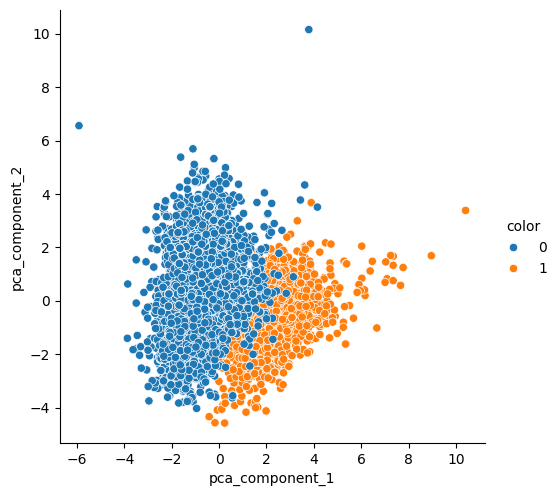

In [39]:
pca_columns = ["pca_component_1", "pca_component_2"]
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd["color"] = wine_y.values

sns.pairplot(pca_wine_pd, hue="color", height=5,
             x_vars=["pca_component_1"], y_vars=["pca_component_2"])

In [40]:
rf_scores(wine_ss, wine_y)


0.9941510037306804


In [41]:
pca_X = pca_wine_pd[["pca_component_1", "pca_component_2"]]
rf_scores(pca_X, wine_y)

0.9756816486054362


In [42]:
pca_wine, pca = get_pca_data(wine_ss, n_component=3)
print_variance_ratio(pca)

cols = ["pca1", "pca_2", "pca_3"]
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)


[0.2390841  0.22216785 0.13930848]
0.6005604314828632
0.9779909989933084


In [43]:
pca_wine_plot = pca_X
pca_wine_plot["color"] = wine_y.values
pca_wine_plot.head()

,pca1,pca_2,pca_3,color
0,3.697851,-0.389684,-2.388043,1
1,3.787395,0.134792,-1.641348,1
2,3.692012,-0.090245,-1.514671,1
3,1.701438,0.104263,3.220205,1
4,3.697851,-0.389684,-2.388043,1


,pca1,pca_2,pca_3,color
1599,-1.329492,3.446101,1.132809,0
1600,-0.247285,-0.598501,-0.276825,0
1601,-0.290413,0.047388,0.794908,0
1602,-1.484636,1.164488,0.215285,0
1603,-1.484636,1.164488,0.215285,0
...,...,...,...,...
6492,-0.976077,-1.730424,-0.420484,0
6493,-0.727025,2.121475,-1.010207,0
6494,-0.925538,-0.388555,-0.268095,0
6495,-2.033889,-3.142137,-0.867321,0


0


KeyError: False

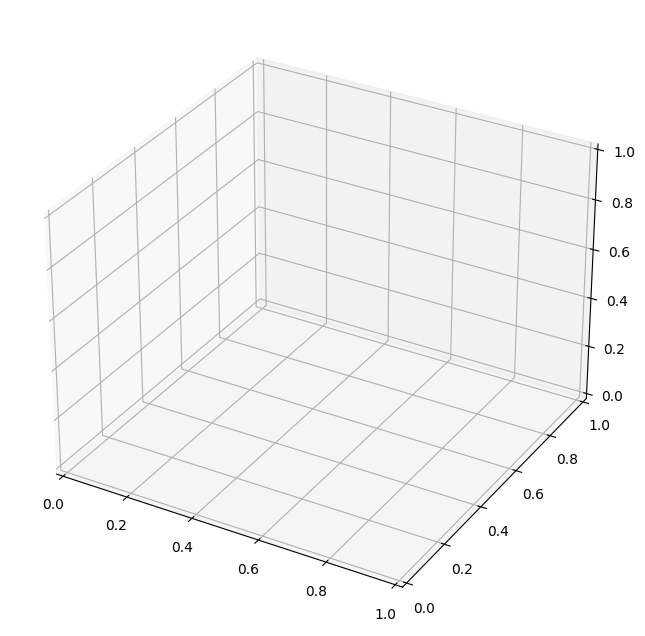

In [47]:
markers=["^", "o"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_plot[pca_wine_plot["color"]==i]["pca_1"]
    y_axis_data = pca_wine_plot[pca_wine_plot["color"]==i]["pca_2"]
    z_axis_data = pca_wine_plot[pca_wine_plot["color"]==i]["pca_3"]
    
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker)
    
ax.view_init(30, 80)
plt.show()